<a href="https://colab.research.google.com/github/Mugi-JB/aws_ml/blob/main/matplotlib_aws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.shape
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

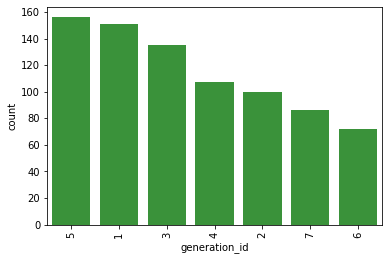

In [ ]:
#pick one color to use for the bars
base_color = sb.color_palette()[2]
#sort the x variable in order of requency
order = pokemon['generation_id'].value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order= order);

#printing the labels vertically
plt.xticks(rotation=90)

Text(0, 0.5, 'count')

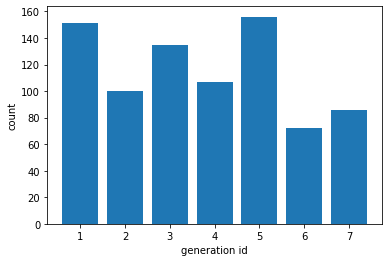

In [ ]:
#creating a bar plot using matplotlib

#define the vales to be ploted on the x axis
x = pokemon['generation_id'].unique()

#define the values to be ploted on the y axis
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x,y)
plt.xlabel('generation id')
plt.ylabel('count')

In [ ]:
order = pokemon['generation_id'].value_counts()
order

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

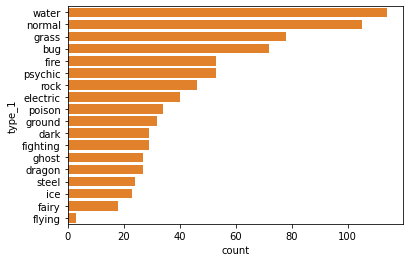

In [ ]:
#pick one color to use for the bars
base_color = sb.color_palette()[1]
#sort the x variable in order of requency
order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order= order)

#printing the labels vertically
plt.xticks(rotation=0);

**Absolute vs. Relative Frequency**

---



In [ ]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [ ]:
new_pokemon = pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'], var_name='type_level' , value_name='type')
new_pokemon.head(10)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [ ]:
#find frequencies of unique values in the type column
type_freq = new_pokemon['type'].value_counts()
type_freq

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [ ]:
type_freq_list = type_freq.index

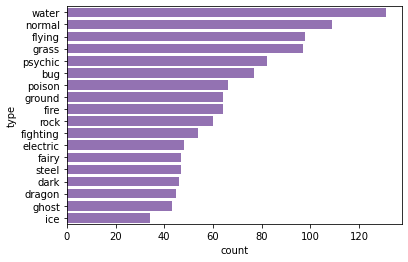

In [ ]:
#plot a horizontal bar graph
sb.countplot(data=new_pokemon, y='type', color = sb.color_palette()[4], order= type_freq_list);

In [ ]:
#creating a bar graph using relative values
n_pokemon = new_pokemon['type'].value_counts().sum()
n_pokemon
max_type_frep = type_freq[0]
max_type_prop = max_type_frep/n_pokemon
max_type_prop

0.10808580858085809

In [ ]:
n_pokemon

1212

In [ ]:
#Create an array of evenly spaced proportioned values
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_type_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [ ]:
tick_props*n_pokemon

array([  0.  ,  24.24,  48.48,  72.72,  96.96, 121.2 ])

In [ ]:
#Create a list of String values that can be used as tick labels.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

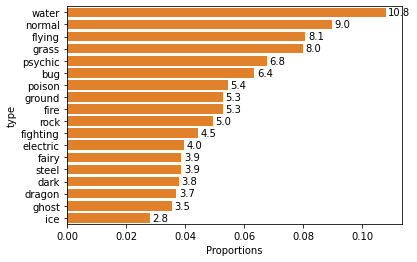

In [ ]:
sb.countplot(data=new_pokemon, y='type', color=sb.color_palette()[1], order= type_freq_list)

plt.xticks(tick_props*n_pokemon,tick_names)
plt.xlabel('Proportions');
#plt.xticks(rotation=90).
for i in range (type_freq.shape[0]):
    count = type_freq[i]
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

In [ ]:
type_freq[0]

131

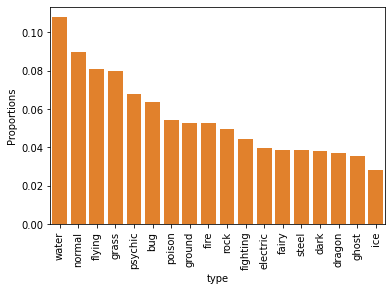

In [ ]:
sb.countplot(data=new_pokemon, x='type', color= sb.color_palette()[1], order= type_freq_list)

plt.yticks(tick_props*n_pokemon, tick_names)
plt.ylabel('Proportions')
plt.xticks(rotation=90);

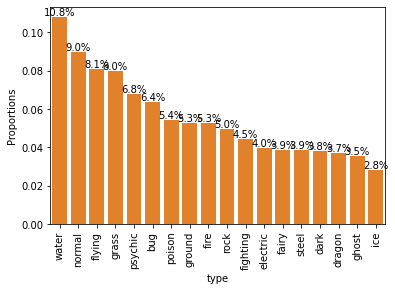

In [ ]:
sb.countplot(data=new_pokemon, x='type', color=sb.color_palette()[1], order= type_freq_list)

plt.yticks(tick_props*n_pokemon,tick_names)
plt.ylabel('Proportions');
plt.xticks(rotation=90)
for i in range (type_freq.shape[0]):
    count = type_freq[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(i,count+1, pct_string, ha='center')

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')